In [75]:
## 引入头文件
import cv2
import numpy as np
from skimage import filters, feature
import os
import matplotlib.pyplot as plt

In [76]:
## 定义路径
# 将path定义为图片文件夹的路径
path = r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\A_source'
os.chdir(path)

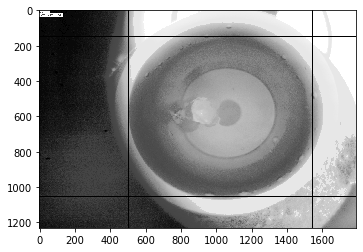

In [77]:
## 提取坩埚中间的圆的方形区域

# 读入
imageTest = cv2.imread('0497.bmp',cv2.IMREAD_GRAYSCALE)
imageTest = cv2.equalizeHist(imageTest)

# 定义用来标记边框的四条线的参数
lineWidth = 5
upInner = 150
downInner = 1050
leftInner = 510
rightInner = 1545

imageTest[upInner-lineWidth:upInner,:] = 0
imageTest[downInner:downInner+lineWidth,:] = 0
imageTest[:,leftInner-lineWidth:leftInner] = 0
imageTest[:,rightInner:rightInner+lineWidth] = 0

plt.imshow(imageTest,cmap=plt.cm.gray)

# 定义出方便调用的函数，得到圆的区域
def getCircleArea(imageTest,shiftY=0,shiftX=0):
    lineWidth = 5
    upInner = 150 + shiftY
    downInner = 1050 + shiftY
    leftInner = 510 + shiftX
    rightInner = 1545 + shiftX
    image = imageTest[upInner:downInner,leftInner:rightInner]
    return image


In [78]:
## 用于计算抖动字典（下方）


# 读入
oneImage = '0497.bmp'
imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
imageTest = cv2.equalizeHist(imageTest)
# 调整偏移
shiftX = 0
shiftY = 0
image = getCircleArea(imageTest,shiftY,shiftX)
antij_dic[oneImage] = [shiftY,shiftX] # 注意是先纵轴后横轴

In [79]:
## 通过上述区域选择来消除抖动，并得到消抖之后的图片，存储

source_list = os.listdir()
antij_dic = {} # 有抖动的bmp字典，对应偏移的y，x值

# TODO: 记得手动看看抖动情况

for oneImage in source_list:
    # 读入
    imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
    imageTest = cv2.equalizeHist(imageTest)

    if oneImage in antij_dic:
        image = getCircleArea(imageTest,*antij_dic[oneImage])
    else:
        image = getCircleArea(imageTest)
    
    # 在上级目录建立新的文件夹用于存储消抖动图片
    try:
        os.makedirs('../Antij_source')
    except:
        pass

    cv2.imwrite('../Antij_source/'+oneImage, image)

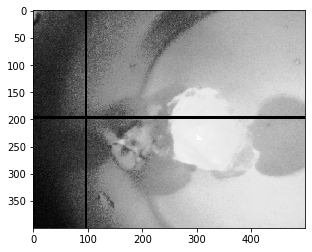

In [82]:
## 裁剪至小框

os.chdir('../Antij_source')

imageTest = cv2.imread('0497.bmp',cv2.IMREAD_GRAYSCALE)

# 定义用来标记边框的四条线的参数
lineWidth = 5
upInner = 200
downInner = 700
leftInner = 100
rightInner = 600

imageTest[upInner-lineWidth:upInner,:] = 0
imageTest[downInner:downInner+lineWidth,:] = 0
imageTest[:,leftInner-lineWidth:leftInner] = 0
imageTest[:,rightInner:rightInner+lineWidth] = 0

plt.imshow(imageTest,cmap=plt.cm.gray)

def getInner(imageTest):
    upInner = 200
    downInner = 700
    leftInner = 100
    rightInner = 600
    image = imageTest[upInner:downInner,leftInner:rightInner]
    return image


for oneImage in os.listdir():
    # 读入
    imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
    imageTest = cv2.equalizeHist(imageTest)
    # 覆盖写回
    image = getInner(imageTest)

    try:
        os.makedirs('../InnerArea')
    except:
        pass

    cv2.imwrite('../InnerArea/'+oneImage, image)
    cv2.imwrite(oneImage,image)

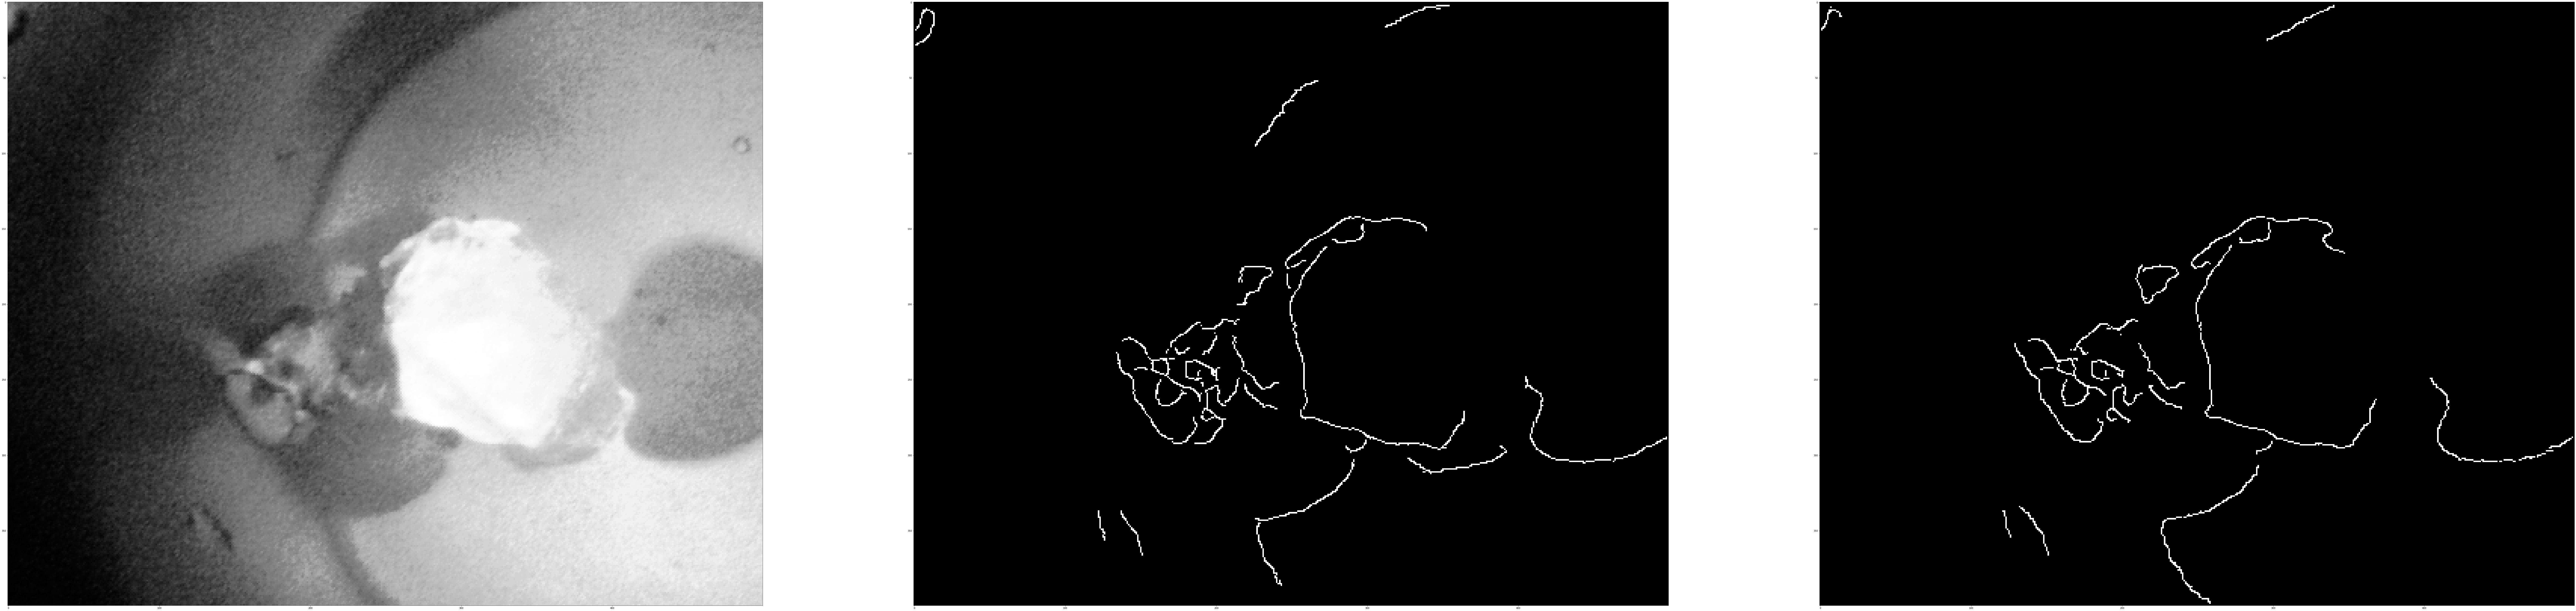

In [81]:
## 用于验证边缘检测算法

# 读取图像（测试）
imageTest = cv2.imread("0497.bmp", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(200,600))
# 直方图均值化
imageTest = cv2.equalizeHist(imageTest)
plt.subplot(1,3,1)
plt.imshow(imageTest,cmap=plt.cm.gray)

# canny边缘检测
ed1 = feature.canny(imageTest,sigma=1.5)
ed2 = feature.canny(imageTest,sigma=1.75)
ed3 = feature.canny(imageTest,sigma=2)
ed4 = feature.canny(imageTest,sigma=2.25)
ed5 = feature.canny(imageTest,sigma=2.5)

# plt.subplot(1,6,2)
# plt.imshow(ed1,cmap=plt.cm.gray)

# # plt.subplot(1,6,3)
# # plt.imshow(ed2,cmap=plt.cm.gray)

# plt.subplot(1,6,4)
# plt.imshow(ed3,cmap=plt.cm.gray)

plt.subplot(1,3,2)
plt.imshow(ed4,cmap=plt.cm.gray)

plt.subplot(1,3,3)
plt.imshow(ed5,cmap=plt.cm.gray)

# 至此得出，sigma选择2.25效果较好